# Basics of Bezier patches

In [1]:
import numpy as np 
import jax 
import jax.numpy as jnp 
import matplotlib.pyplot as plt 
import pyvista as pv 
import pinns

### Curves in 2D

Define a patch and plot it together with the control points.

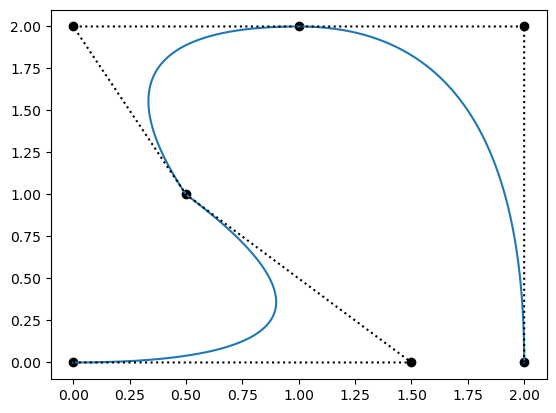

In [2]:
control_points = np.array([[0.0,0.0],[1.5,0.0],[0.5,1],[0,2],[1,2],[2,2],[2,0]])
basis = pinns.functions.PiecewiseBernsteinBasisJAX(np.array([0,1/3,2/3,1]), 2)
patch = pinns.geometry.PatchTensorProduct([basis], control_points, 0, 2)

t = np.linspace(0,1,1000).reshape([-1, 1])
xs = patch(t)
plt.figure()
plt.plot(xs[:,0], xs[:,1])
plt.scatter(control_points[:,0], control_points[:,1], color='k')
plt.plot(control_points[:,0], control_points[:,1], 'k:')

Now with linear Bezier

In [ ]:
basis = pinns.functions.PiecewiseBernsteinBasisJAX(np.array([0,1/3,2/3,1]), 1)
patch_lin = pinns.geometry.PatchTensorProduct([basis], control_points, 0, 2)

xs = patch_lin(t)
plt.figure()
plt.plot(xs[:,0], xs[:,1])
plt.scatter(control_points[:,0], control_points[:,1], color='k')
plt.plot(control_points[:,0], control_points[:,1], 'k:')

### Surface in 2D


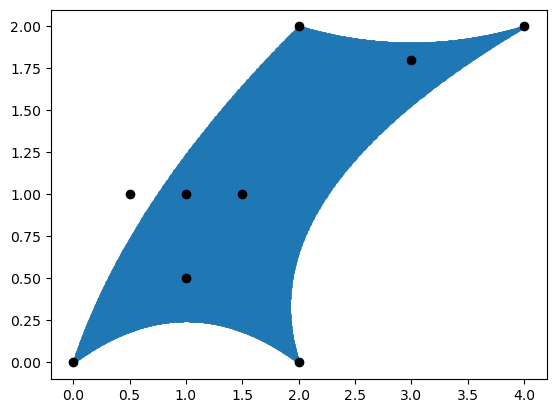

In [19]:
control_points = np.zeros((3, 3, 2))
control_points[0,0,:] = [0.0, 0]
control_points[0,1,:] = [1.0, 0.5]
control_points[0,2,:] = [2.0, 0]
control_points[1,0,:] = [0.5, 1]
control_points[1,1,:] = [1.0, 1]
control_points[1,2,:] = [1.5, 1]
control_points[2,0,:] = [2.0, 2]
control_points[2,1,:] = [3.0, 1.8]
control_points[2,2,:] = [4.0, 2]
basis = pinns.functions.PiecewiseBernsteinBasisJAX(np.array([0.0,1]), 2)
patch = pinns.geometry.PatchTensorProduct([basis, basis], control_points, 0, 2)

u1, u2 = np.meshgrid(np.linspace(0,1,400), np.linspace(0,1,400))
xs = patch(np.concatenate((u1.reshape([-1,1]), u2.reshape([-1,1])),1))

plt.figure()
plt.scatter(xs[:,0], xs[:,1], s=0.5)
plt.scatter(control_points[...,0].flatten(), control_points[...,1].flatten(), c='k')
# plt.contourf(xs[:,0].reshape([400,-1]), xs[:,1].reshape([400,-1]), 0*xs[:,0].reshape([400,-1]))

### Surfaces in 3D

/home/yonnss/anaconda3/envs/jax-new/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


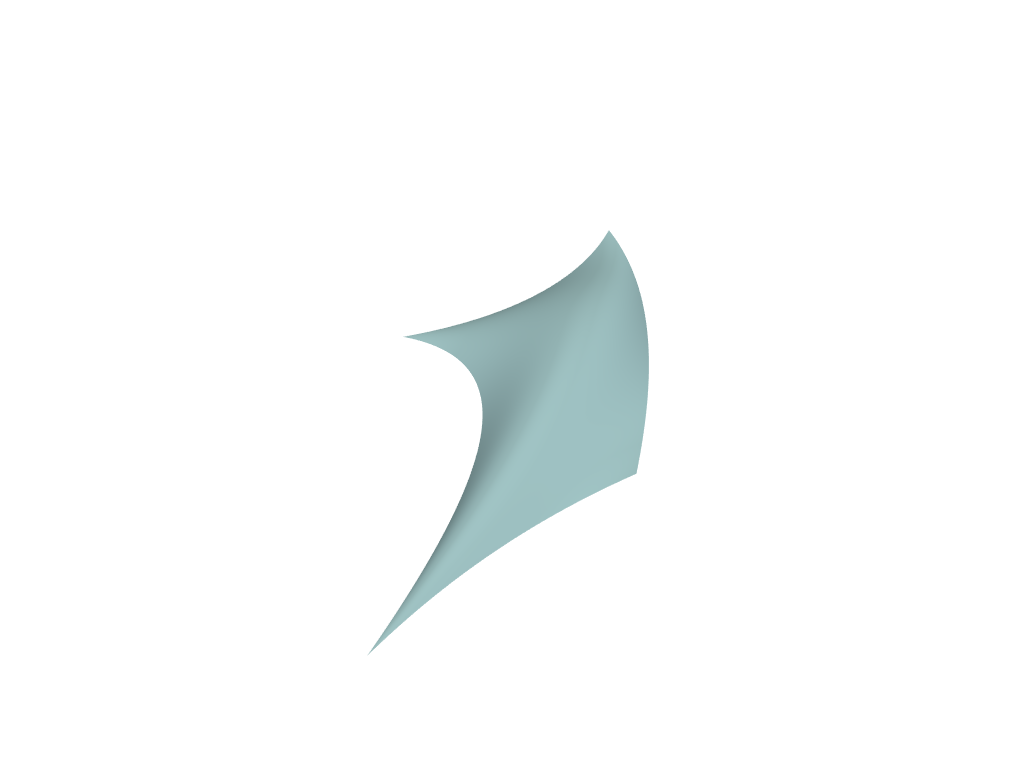

In [27]:
control_points = np.zeros((3, 3, 3))
control_points[0,0,:] = [0.0, 0, 0.0]
control_points[0,1,:] = [1.0, 0.5, 0.0]
control_points[0,2,:] = [2.0, 0, 0.0]
control_points[1,0,:] = [0.5, 1, 0.0]
control_points[1,1,:] = [1.0, 1, 1.0]
control_points[1,2,:] = [1.5, 1, 0.0]
control_points[2,0,:] = [2.0, 2, 0.0]
control_points[2,1,:] = [3.0, 1.8, 0.0]
control_points[2,2,:] = [4.0, 2, 0.0]

basis = pinns.functions.PiecewiseBernsteinBasisJAX(np.array([0.0,1]), 2)
patch = pinns.geometry.PatchTensorProduct([basis, basis], control_points, 0, 3)

u1, u2 = np.meshgrid(np.linspace(0,1,400), np.linspace(0,1,400))
xs = np.array(patch(np.concatenate((u1.reshape([-1,1]), u2.reshape([-1,1])),1)))

pl = pv.Plotter()
grid = pv.StructuredGrid(xs[:,0].reshape([400, -1]), xs[:,1].reshape([400, -1]), xs[:,2].reshape([400, -1]))
pl.add_mesh(grid)

pl.show()